# Importing Functions

In [185]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Hard Code paramters

In [186]:
from halomod import halo_model
from astropy.cosmology import Planck18
from hmf.halos import mass_definitions

from halomod.concentration import Duffy08
from halomod.concentration import GrowthFactor
from halomod.profiles import NFW


import halomod
import hmf
from halomod import TracerHaloModel
from astropy.cosmology import Planck18
from hmf.halos import mass_definitions

#### halomod dependencies

In [187]:
from halomod import halo_model
from astropy.cosmology import Planck18
from hmf.halos import mass_definitions

from halomod.concentration import Duffy08
from halomod.concentration import GrowthFactor
from halomod.profiles import NFW


import halomod
import hmf
from halomod import TracerHaloModel
from astropy.cosmology import Planck18
from hmf.halos import mass_definitions
from halomod.halo_model import DMHaloModel

# Global Parameters

In [188]:
halo_min = 30000
halo_max = 31000
z=2
b = 15
particle_mass = 2109081520.453063
SOdensityL1 = 208.4022045135498
file_dir = f'/Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z{z}/'

# Halo Informations

In [189]:
def halo_info(halo_min,halo_max,file_dir):
    so_central_X = []
    so_central_Y = []
    so_central_Z = []
    x_L2com_X = []
    x_L2com_Y = []
    x_L2com_Z = []
    particle_number = []
    so_radius = []
    r100=[]


    file_paths = glob.glob(os.path.join(file_dir,'halo_info','*halo_info_*.csv'))
    file_paths.sort()
    for file_path in file_paths:
        print("Processing Halo info:", file_path)
        halos = pd.read_csv(file_path)
        N = halos['N']
        indices =[]
        for Ni in N:
            if halo_min <= Ni <= halo_max:
                index = N[N==Ni].index.to_list()
                indices.extend(index)
        for indx in indices:
            so_central_X.append(halos['SO_central_particle_X'][indx])
            so_central_Y.append(halos['SO_central_particle_Y'][indx])
            so_central_Z.append(halos['SO_central_particle_Z'][indx])
            x_L2com_X.append(halos['x_L2com_X'][indx])
            x_L2com_Y.append(halos['x_L2com_Y'][indx])
            x_L2com_Z.append(halos['x_L2com_Z'][indx])
            particle_number.append(halos['N'][indx])
            so_radius.append(halos['SO_radius'][indx])
            r100.append(halos['r100_L2com'][indx])
        del indices
    return so_central_X,so_central_Y,so_central_Z,x_L2com_X,x_L2com_Y,x_L2com_Z,particle_number,so_radius, r100

In [190]:
so_central_X, so_central_Y, so_central_Z, x_L2com_X, x_L2com_Y, x_L2com_Z, particle_number,so_radius, r100 = halo_info(halo_min,halo_max,file_dir)

Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_000.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_001.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_002.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_003.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_004.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_005.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/hal

# Subsample Data

In [191]:
def subsample_data(halo_min, halo_max, file_dir):
    particle_range = f'{halo_min}-{halo_max}'
    print(particle_range)
    outer_list = []
    
    file_paths = glob.glob(os.path.join(file_dir, '**', '**', f'*{particle_range}*','*halo_info_*.csv'))
    file_paths.sort()
    print("Total file paths:", len(file_paths))
    
    for file_path in file_paths:
        print("Processing file:", file_path)
        subsamples = pd.read_csv(file_path)

        Subsample_A_X = subsamples['Subsample_A_X']
        Subsample_A_Y = subsamples['Subsample_A_Y']
        Subsample_A_Z = subsamples['Subsample_A_Z']
        
        Subsample_B_X = subsamples['Subsample_B_X']
        Subsample_B_Y = subsamples['Subsample_B_Y']
        Subsample_B_Z = subsamples['Subsample_B_Z']
        
        Subsample_X = np.vstack((Subsample_A_X, Subsample_B_X))
        Subsample_Y = np.vstack((Subsample_A_Y, Subsample_B_Y))
        Subsample_Z = np.vstack((Subsample_A_Z, Subsample_B_Z))

        x = [number for array in Subsample_X for number in array if not np.isnan(number)]
        y = [number for array in Subsample_Y for number in array if not np.isnan(number)]
        z = [number for array in Subsample_Z for number in array if not np.isnan(number)]

        outer_list.append((x, y, z))
        
        
    print("Total unique file locations processed:", len(outer_list))
    return outer_list

In [192]:
X_Y_Z_lists = subsample_data(halo_min, halo_max, file_dir)

30000-31000
Total file paths: 23
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000/halo_info_000_3408220002004000_subsample_data_30286.csv
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000/halo_info_000_4405820536003000_subsample_data_30650.csv
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000/halo_info_000_4607020337000000_subsample_data_30012.csv
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000/halo_info_000_900630160001000_subsample_data_30673.csv
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000

In [193]:
print(particle_number)
print(max(r100))

[30673, 30286, 30650, 30012, 30069, 30331, 30136, 30638, 30871, 30780, 30197, 30873, 30214, 30103, 30204, 30234, 30189, 30142, 30604, 30825, 30906, 30549, 30322]
1.0394925


# Halo Plotting

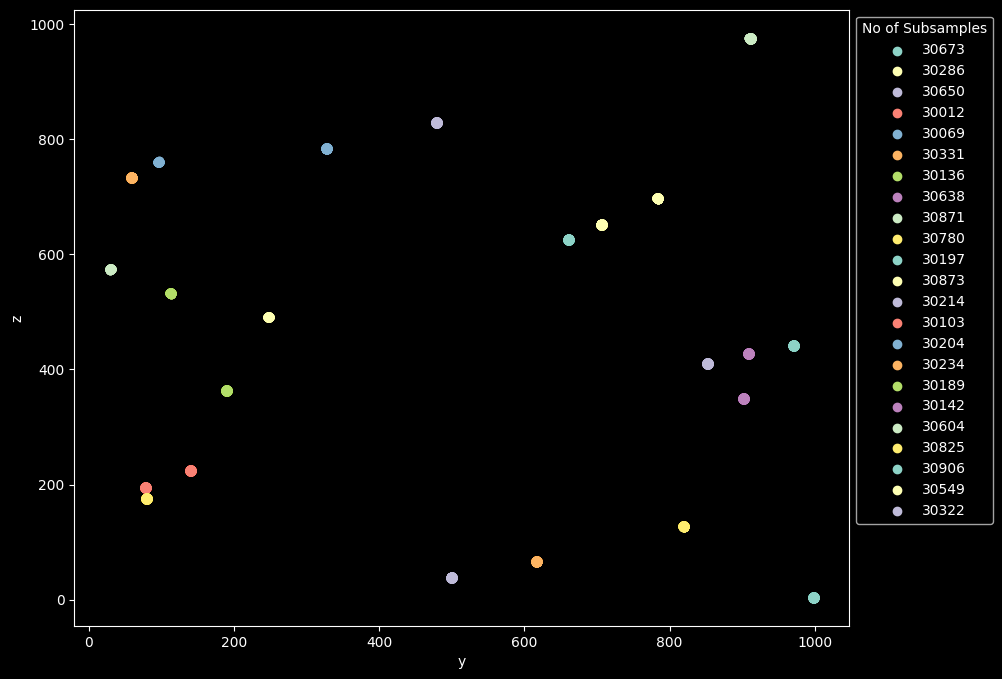

In [194]:
fig=plt.figure(figsize=(10,8),dpi=100,facecolor='black')
plt.style.use('dark_background')

for i in range(len(particle_number)):
    plt.scatter(X_Y_Z_lists[i][1],X_Y_Z_lists[i][2],label=f'{particle_number[i]}')
    #plt.scatter(x_L2com_Y[i], x_L2com_Z[i], color='red')
plt.xlabel('y')
plt.ylabel('z')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title='No of Subsamples')

# The Halo

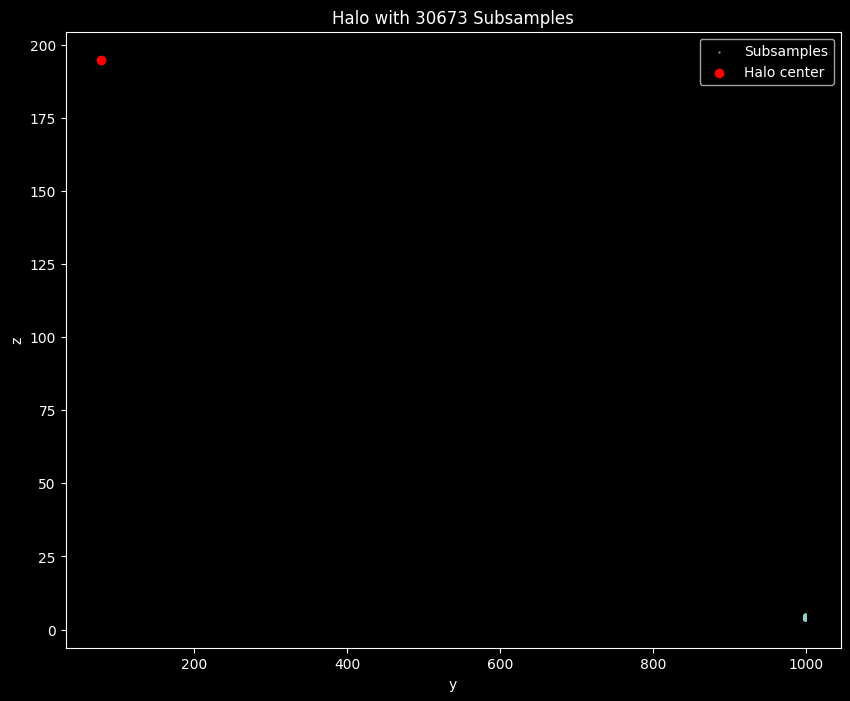

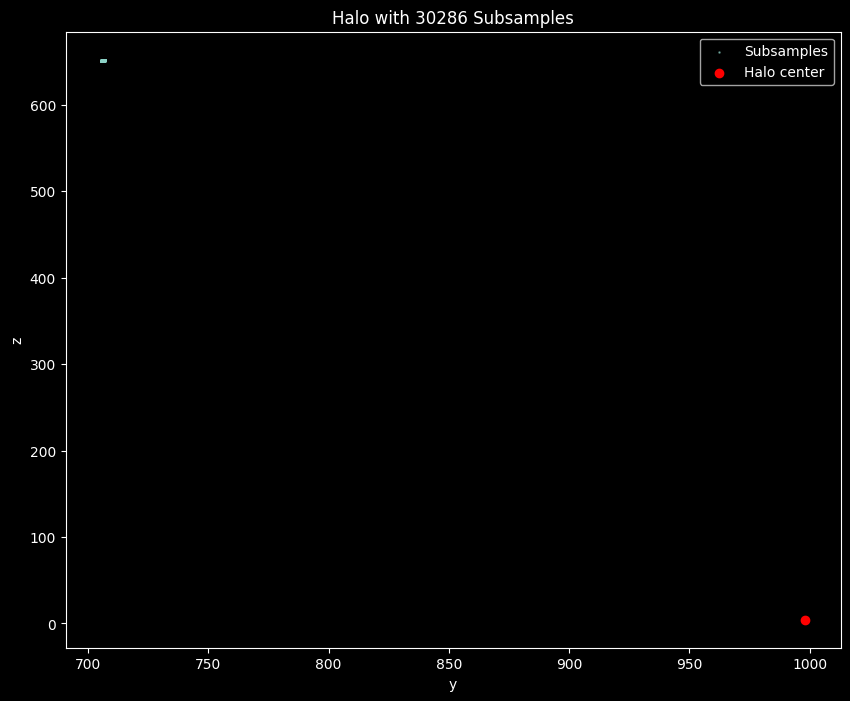

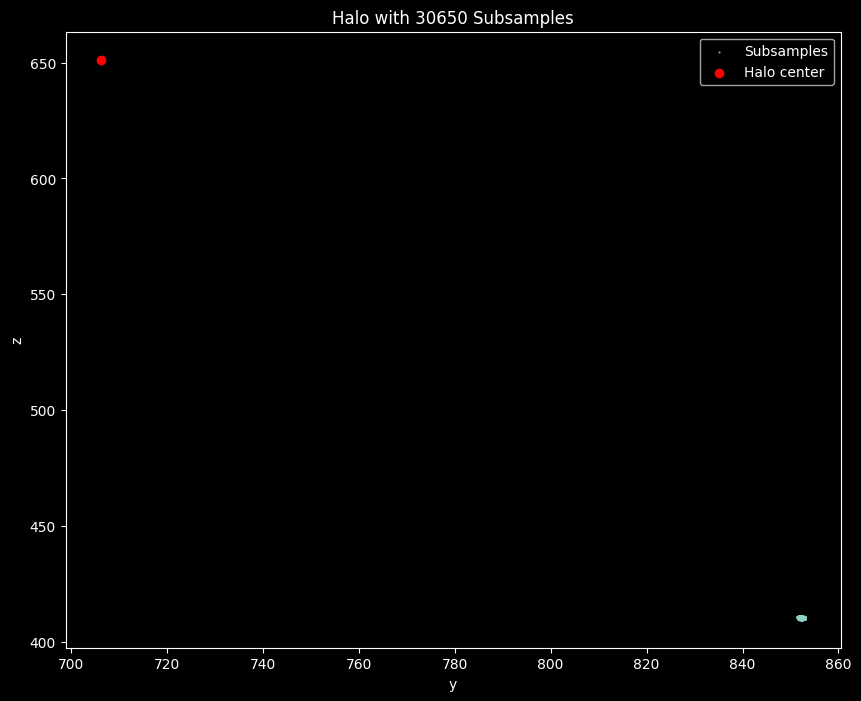

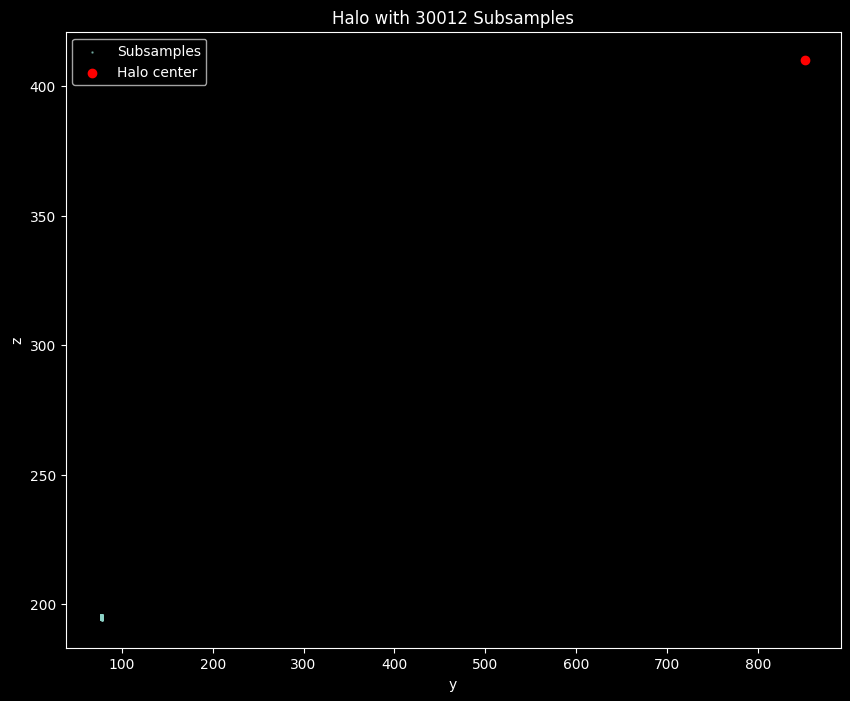

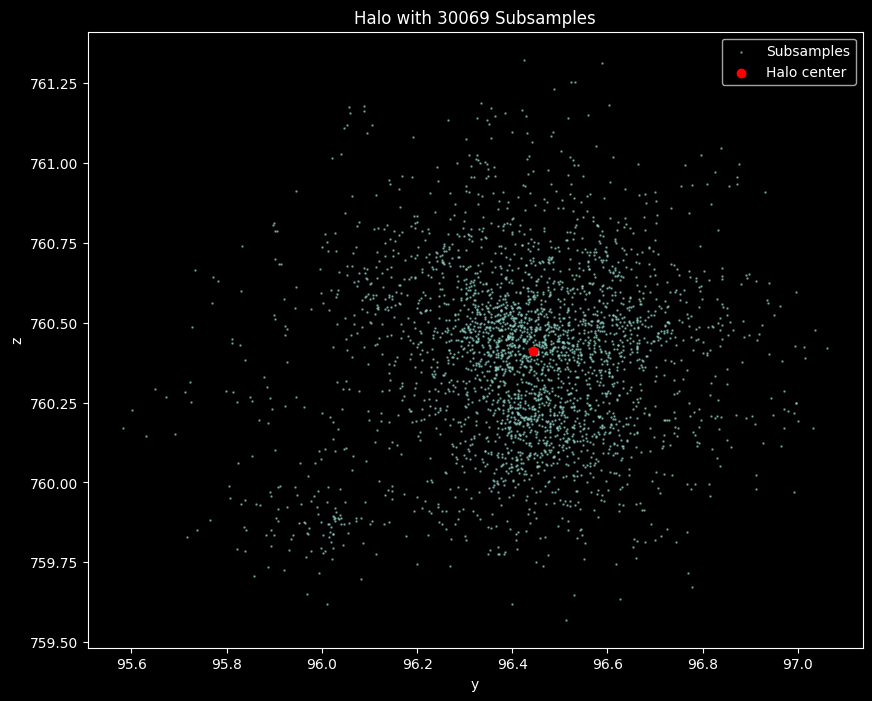

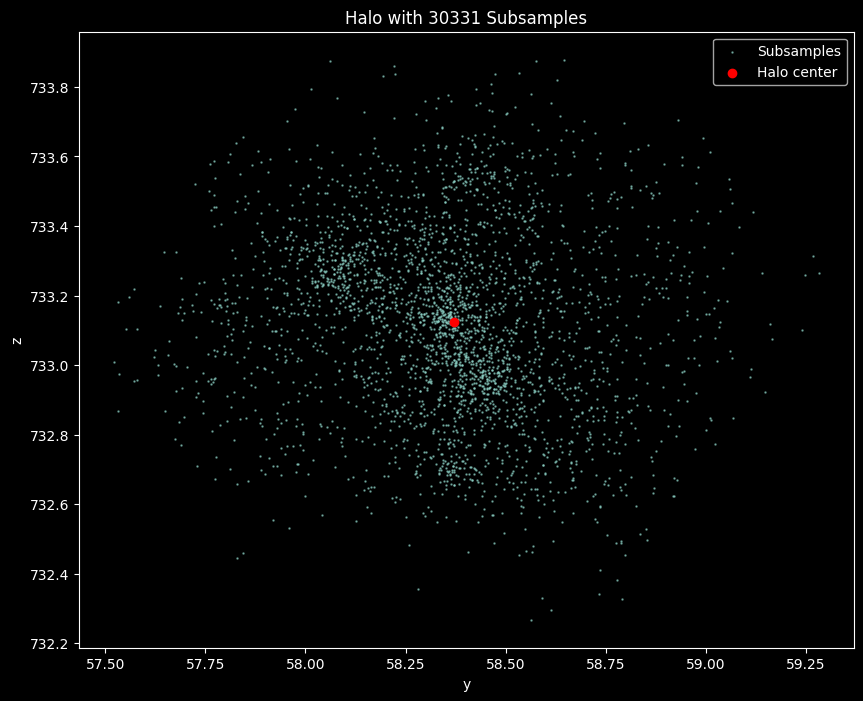

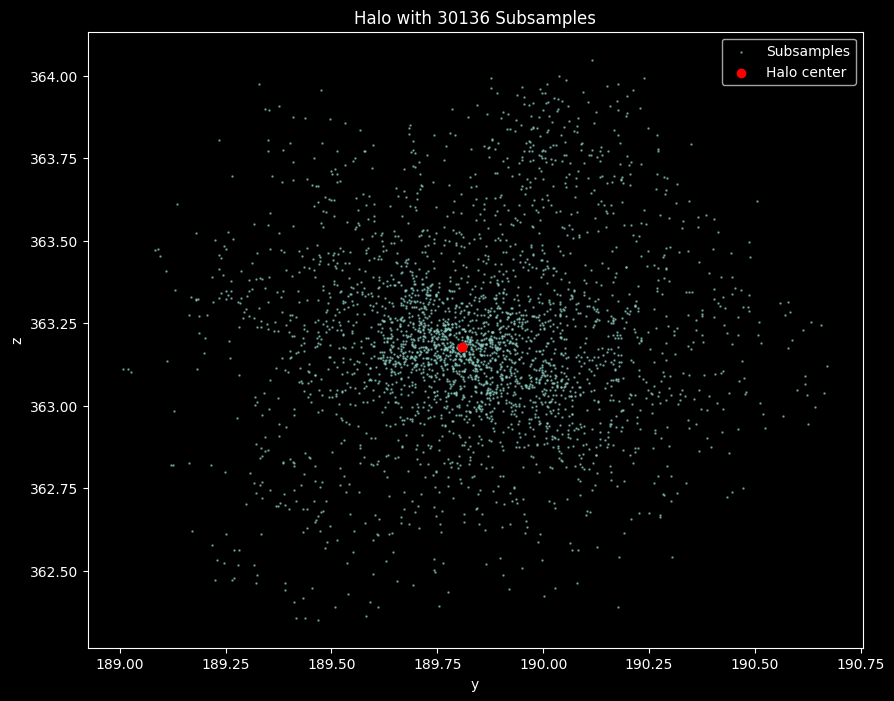

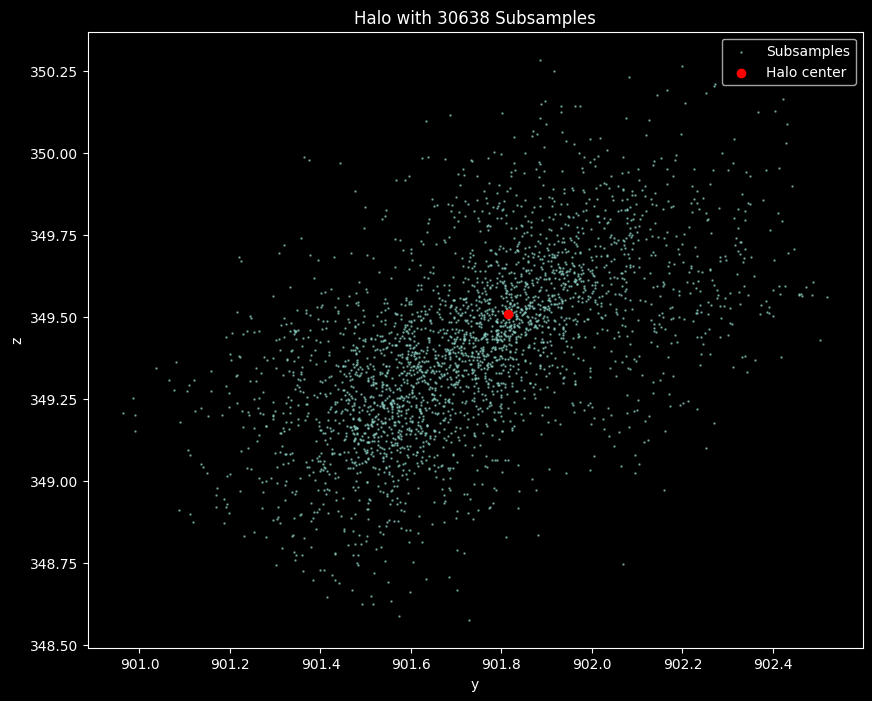

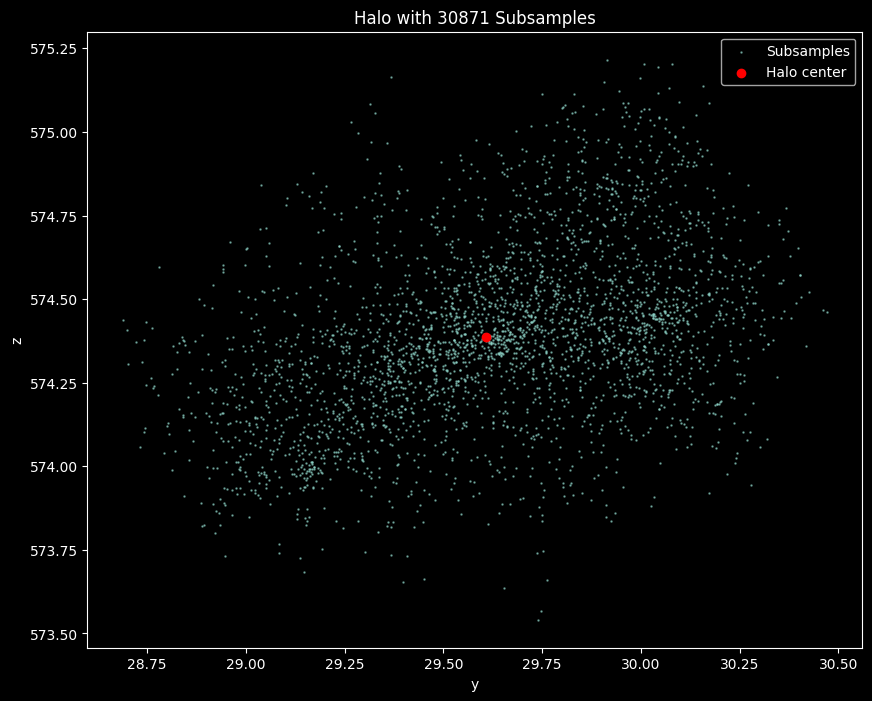

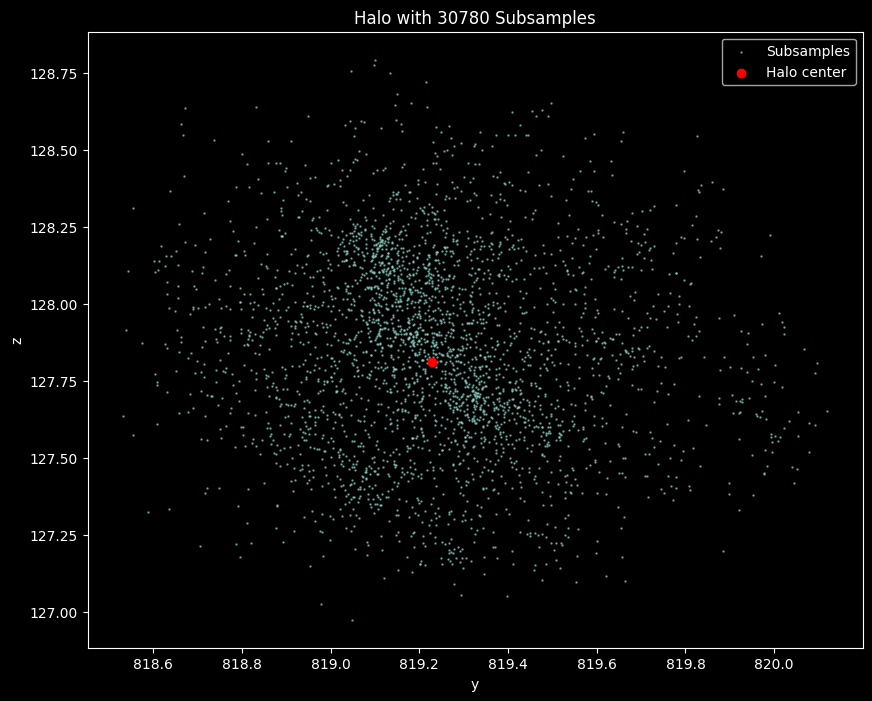

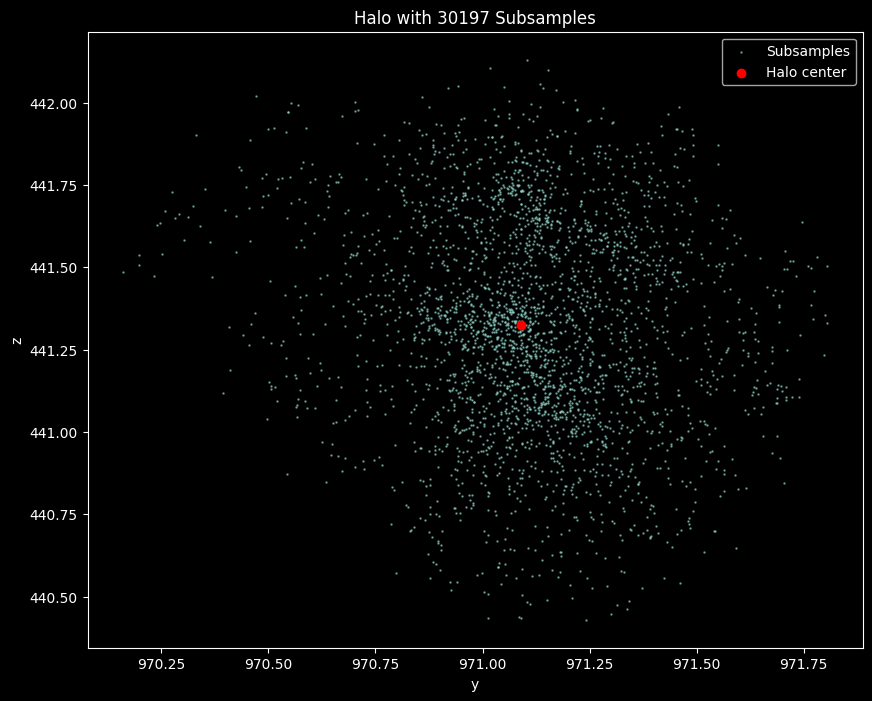

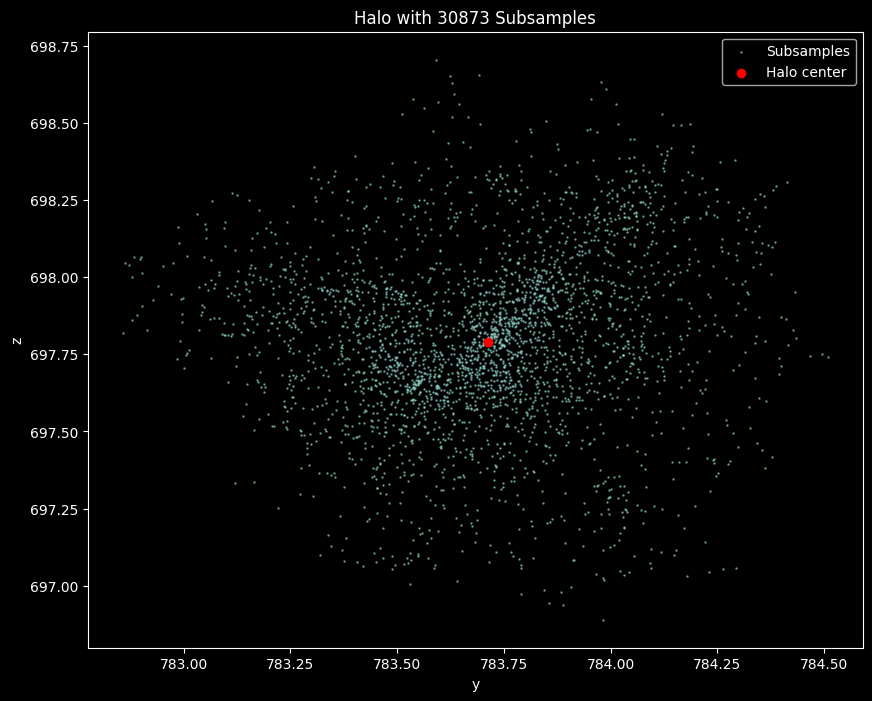

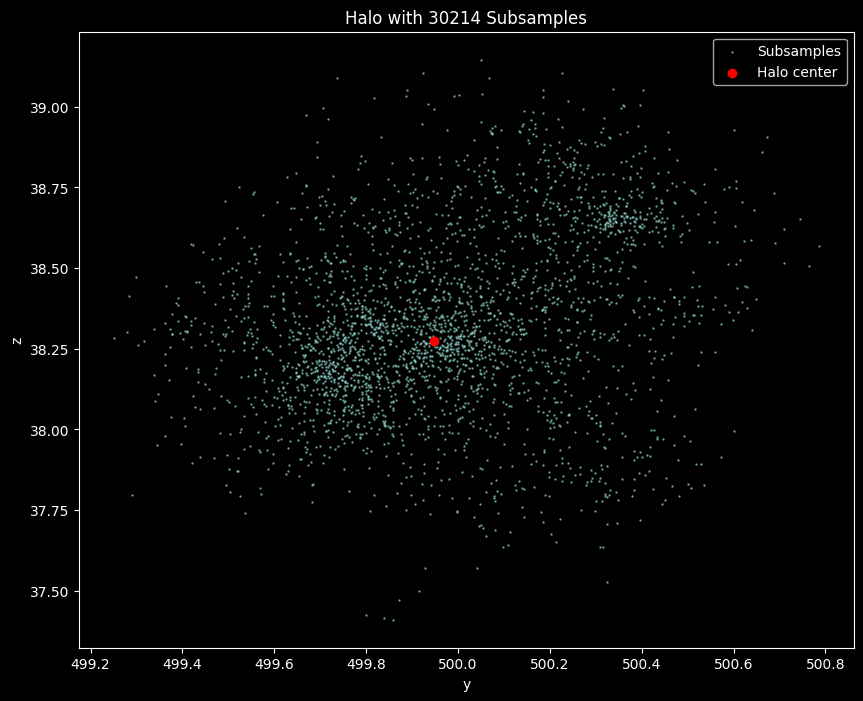

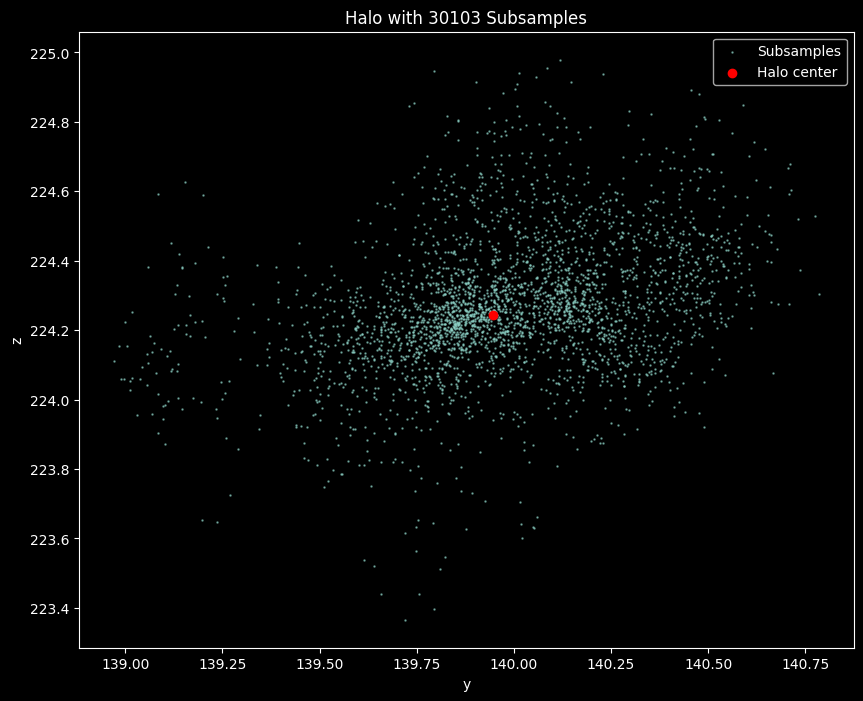

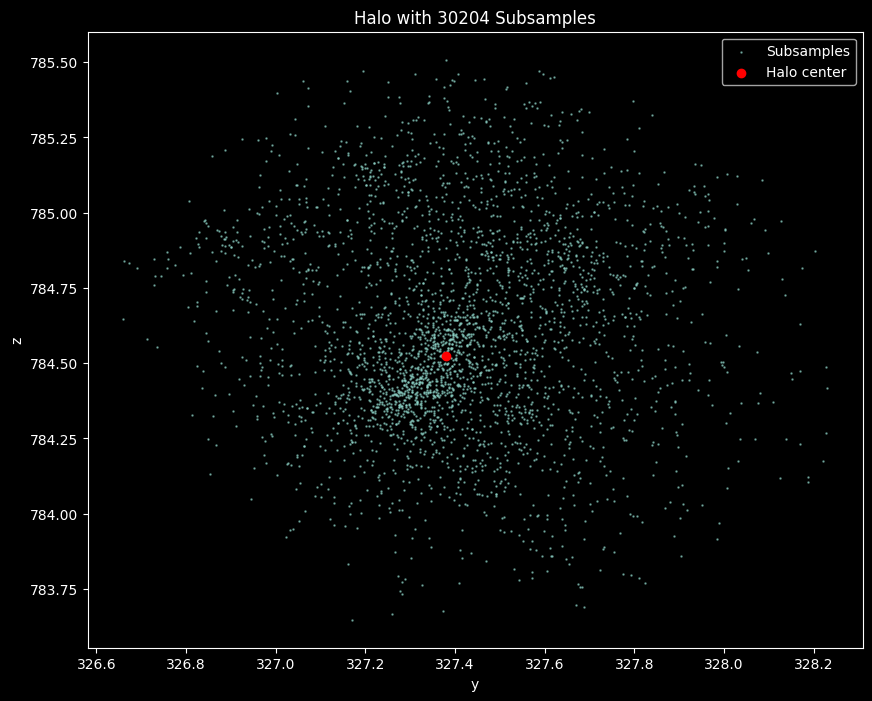

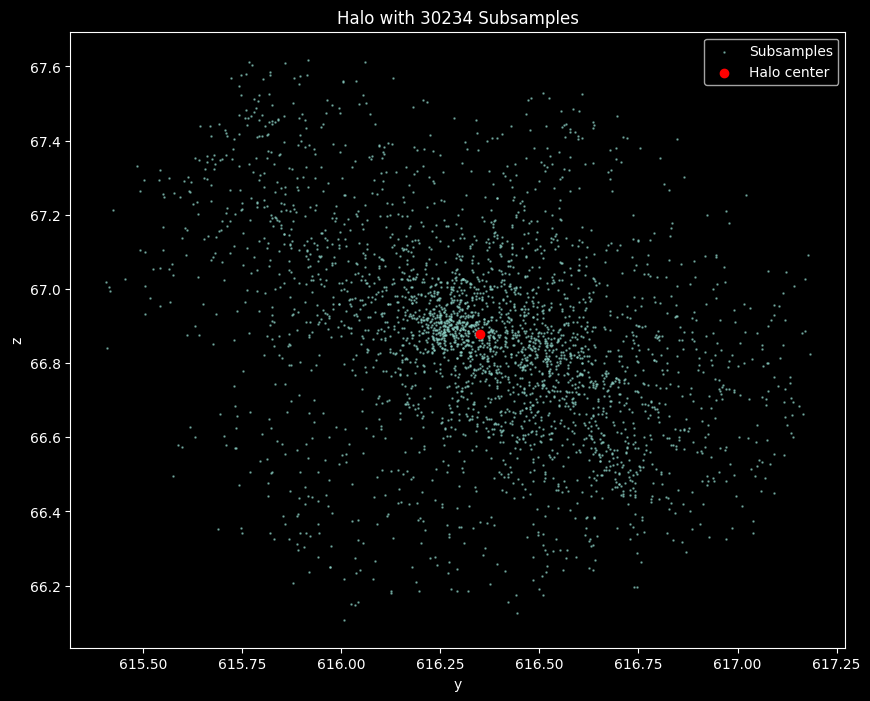

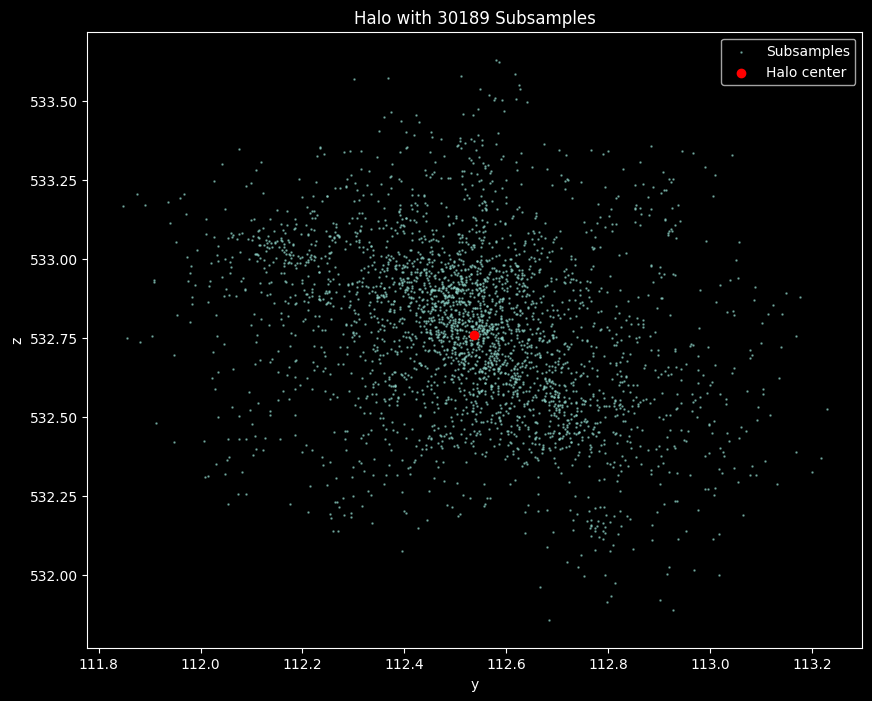

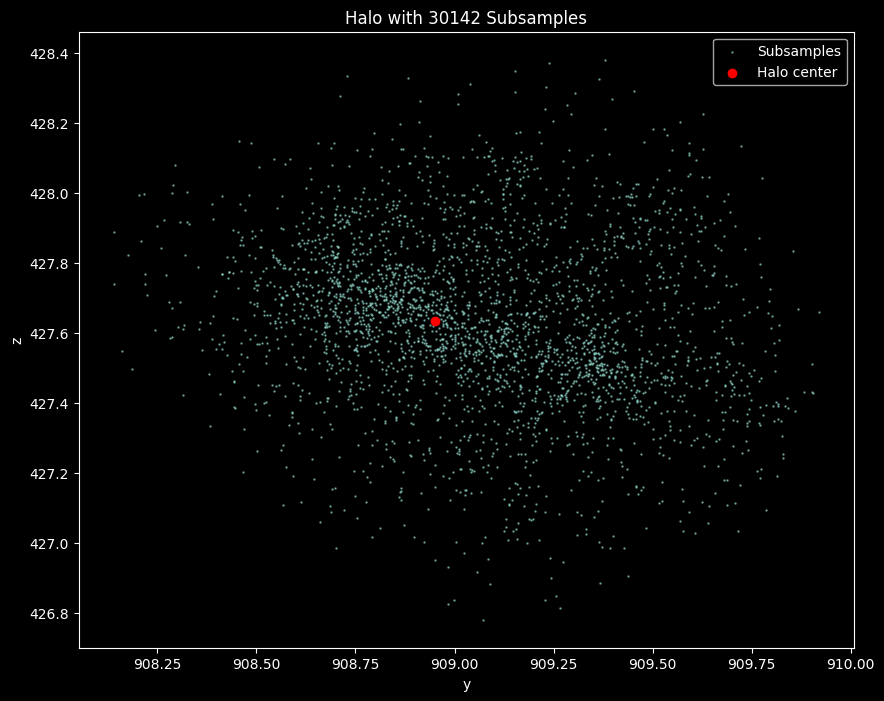

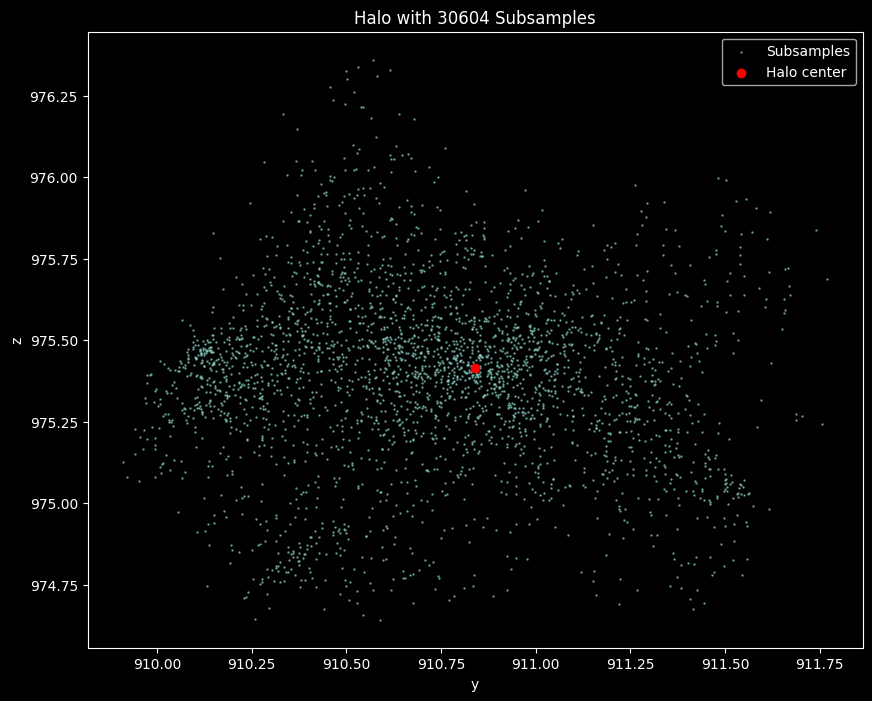

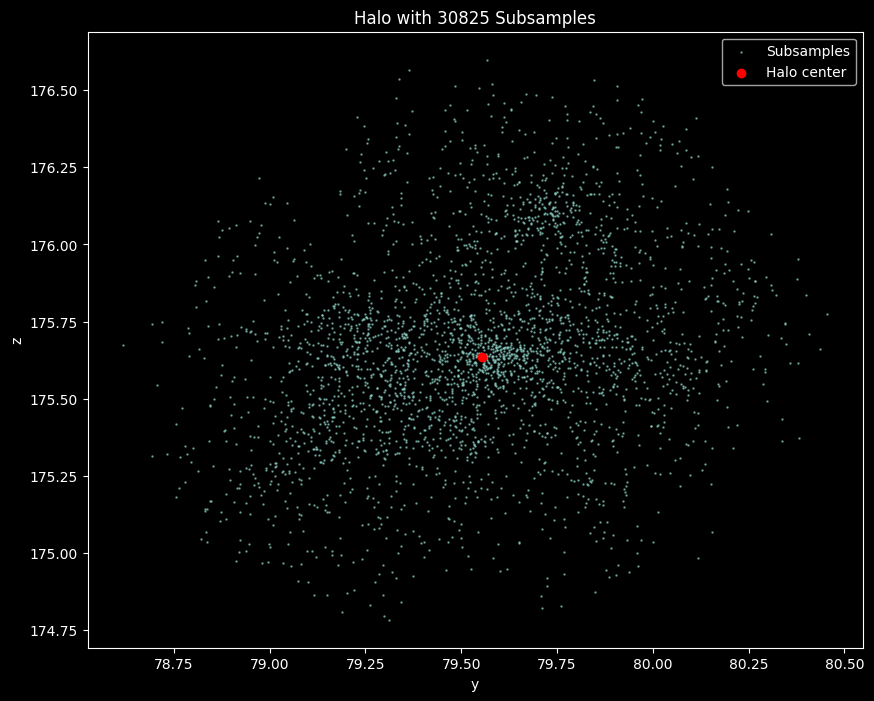

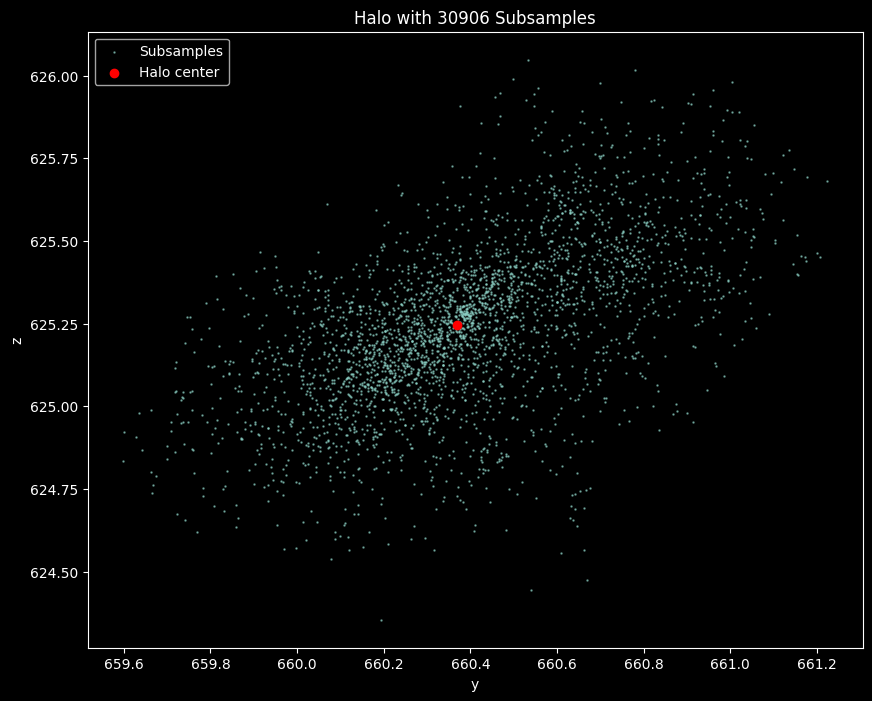

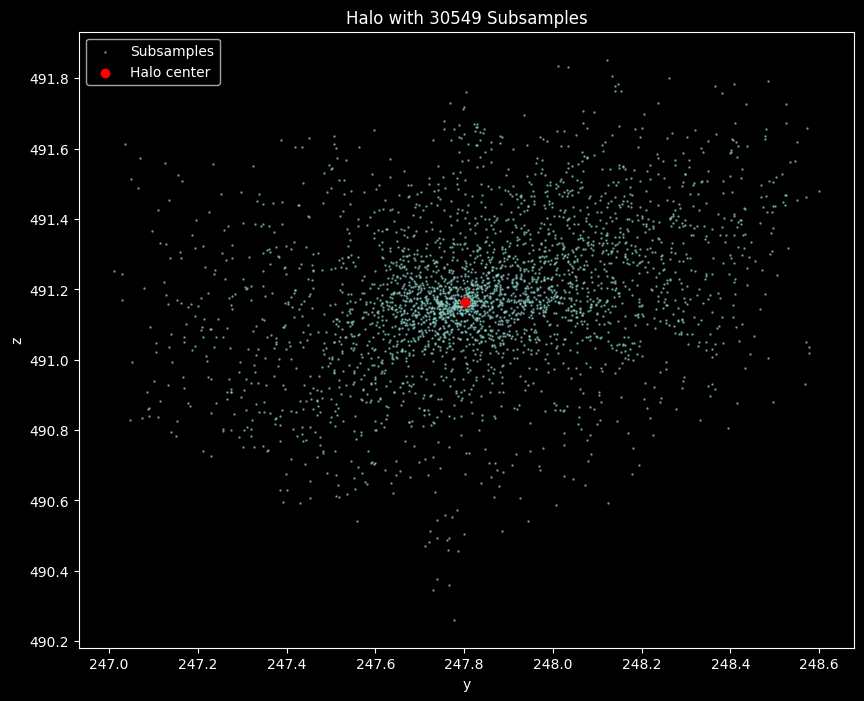

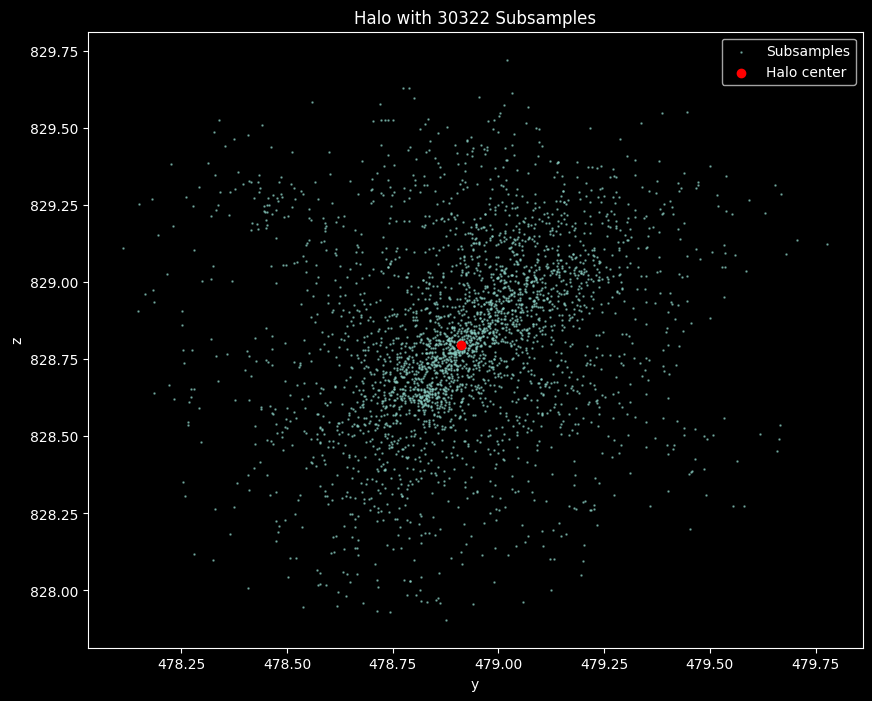

"h=22\ns=22\n\nplt.scatter(X_Y_Z_lists[h][1],X_Y_Z_lists[h][2],color='#52c0d9', label='Subsamples')\nplt.scatter(x_L2com_Y[s],x_L2com_Z[s], color='red', label='Halo center')"

In [195]:
for h in range(len(particle_number)):
    #h=0
    fig=plt.figure(figsize=(10,8),dpi=100,facecolor='black')
    plt.scatter(X_Y_Z_lists[h][1],X_Y_Z_lists[h][2],s=0.6,alpha=0.6, label='Subsamples')
    plt.scatter(x_L2com_Y[h],x_L2com_Z[h], color='red', label='Halo center')
    plt.title(f'Halo with {particle_number[h]} Subsamples')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.legend()
    plt.show()

'''h=22
s=22

plt.scatter(X_Y_Z_lists[h][1],X_Y_Z_lists[h][2],color='#52c0d9', label='Subsamples')
plt.scatter(x_L2com_Y[s],x_L2com_Z[s], color='red', label='Halo center')'''



In [196]:
total_mass=0
for i in range(len(particle_number)):
    print(np.log10(particle_number[i]*particle_mass))
    total_mass+= particle_number[i]*particle_mass

avg_mass=total_mass/len(particle_number)

print('Avg Mass:',total_mass/len(particle_number))
print('ln10:', np.log10(avg_mass))

13.810849621079704
13.805335284475358
13.81052384531687
13.801388304240565
13.802212351539893
13.805980095511067
13.803178973657648
13.81035377829398
13.813644064213007
13.812361981957896
13.804057165440687
13.813672199382871
13.80430159133621
13.802703145063663
13.804157828058424
13.804588975201849
13.803942093871928
13.803265431964162
13.809871559754358
13.812996451730205
13.814136166726659
13.809090364949684
13.805851209870925
Avg Mass: 64171831333270.3
ln10: 13.807344433347371


# Halo Radius Calculation

In [197]:
def radius(x_cent,y_cent,z_cent, subsample_list):
    ra=[]
    for i in range(len(x_cent)):
        rad = np.sqrt(((subsample_list[i][0])-x_cent[i])**2+((subsample_list[i][1])-y_cent[i])**2+(((subsample_list[i][2])-z_cent[i])**2))
        ra.append(rad)
        
    radii=[]
    for j in range(len(ra)):
        radii.append(np.max(ra[j]))
    return radii,ra

### r100 radius

In [198]:
radi,ra = radius(x_L2com_X, x_L2com_Y, x_L2com_Z, X_Y_Z_lists)

print(np.min(ra[10]))

    

0.018637502515099137


# Radial Density Calculation

In [199]:
plt.style.use('default')
def rad_density_function(rad_list, particle_mass, b,z, part_numb):

    min_rad=[]
    max_rad=[]
    for i in range(len(rad_list)):
        min = np.min(rad_list[i])
        max=np.max(rad_list[i])
        min_rad.append(min)
        max_rad.append(max)

    bineq = np.logspace(np.log10(np.min(min_rad)-0.0001),np.log10(np.max(max_rad)+0.01),b)

    

    freq=0
    for i in range(len(rad_list)):
        frequency, bin_edge = np.histogram(rad_list[i], bins=bineq)
        freq+=frequency
    #upto this everything is okay

    total_mass=0
    for i in range(len(part_numb)):
        total_mass += part_numb[i]*particle_mass
    
    avg_mass=total_mass/len(part_numb)
    fraction= np.sum(freq)/np.sum(part_numb)
    
    rad_density = []  
    mass_pt = []  
    for k in range(len(bineq)-1):
        den = (avg_mass/((4/3)*np.pi*((bineq[k])**3-(bineq[k-1])**3)))/fraction
        mid_pt = (bineq[k+1]*bineq[k])**(1/2)

        #print(den)

        rad_density.append(den)
        mass_pt.append(mid_pt)
    rad_density_comoving = ((1+z)**3)* np.array(rad_density)
    #print(rad_density_comoving)
    plt.loglog()
    plt.scatter (mass_pt,rad_density_comoving)

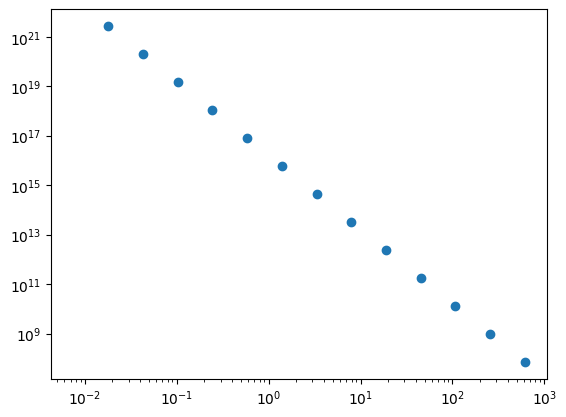

In [200]:
rad_density_function(ra, particle_mass, b,z,particle_number)

# Radial Density (Hard Coding)

In [201]:
def radial_density_prof(part_numb,radius,so_radius,z):

    #cosmo params
    
    h=0.6736
    Ob0 = 0.02237/h**2
    '''Ocdm0 = 0.220
    Onu0 = 0.0
    Om0 = Ocdm0 + Ob0 + Onu0'''
    Om0 = 0.315192
    n_s = 0.9649
    sigma_8 = 0.807952
    Ode0=0.684808

    #fitting params
    m= -0.10
    A2= 3.44
    b= 430.49
    c0= 3.19
    particle_mass = 2109081520.453063

    #rad density equation paramters
    delta = SOdensityL1
    G = 4.301*10**(-9) #gravitational const (km2 Mpc MSun-1 s)

    dark_matter_model = halo_model.DMHaloModel(z=z, cosmo_model = Planck18, cosmo_params= {'Om0':Om0, 'Ob0':Ob0 , 'Tcmb0':2.7255, 'Neff': 3.04, 'H0': h*100},sigma_8= sigma_8, n= n_s,mdef_model=mass_definitions.SOMean,halo_concentration_model='Ludlow16',growth_model=GrowthFactor)
    non_linear_mass = dark_matter_model.mass_nonlinear
    
    m200=[]
    for i in range(len(part_numb)):
        M_200 = particle_mass*part_numb[i]
        m200.append(M_200)

    m200_avg = np.sum(m200)/len(part_numb)
    c_delta= A2*((((m200_avg/non_linear_mass)/b)**m)*(1.0+((m200_avg/non_linear_mass)/b)**(-m))-1.0)+c0
    Om = (Om0*(1.0+z)**3.0)
    #H_z = h*100*np.sqrt(Om+(1.0-Om0))
    H_z=h*100*np.sqrt((Om0*(1+z)**3)+Ode0)

    rho_c1 = (3.0*H_z**2.0)/(8.0*3.14*G)
    rho_c = rho_c1/h**2
    rho_m = Om*rho_c
    A1 = np.log(1.0+c_delta)-(c_delta/(1.0+c_delta))
    
    r = radius
    r_delta = max(so_radius)
    #rho = (delta*rho_c)/(3*A1*(r/r_delta)*((1/c_delta)+(r/r_delta))**2)
    rho = (delta*rho_m)/(3*A1*(r/r_delta)*((1/c_delta)+(r/r_delta))**2)
    #rad_density.extend(rho)
    plt.loglog()
    indices = np.argsort(radius)
    sorted_radius = np.array(radius)[indices]
    sorted_rho = np.array(rho)[indices]
    print(sorted_rho)
    #print(len(rho))
    plt.plot(sorted_radius, sorted_rho,'--',lw=0.8,color='green',label='Equation')

In [204]:
radial_density_prof(part_numb,radi,so_radius,z)
plt.show()

NameError: name 'part_numb' is not defined

# Comparison

In [ ]:
def rad_density_function(rad_list, particle_mass, b,z, part_numb):

    min_rad=[]
    max_rad=[]
    for i in range(len(rad_list)):
        min = np.min(rad_list[i])
        max=np.max(rad_list[i])
        min_rad.append(min)
        max_rad.append(max)

    bineq = np.logspace(np.log10(np.min(min_rad)-0.0001),np.log10(np.max(max_rad)+0.01),b)

    

    freq=0
    for i in range(len(rad_list)):
        frequency, bin_edge = np.histogram(rad_list[i], bins=bineq)
        freq+=frequency
    #upto this everything is okay

    total_mass=0
    for i in range(len(part_numb)):
        total_mass += part_numb[i]*particle_mass
    
    avg_mass=total_mass/len(part_numb)
    fraction= np.sum(freq)/np.sum(part_numb)
    
    rad_density = []  
    mass_pt = []  
    for k in range(len(bineq)-1):
        den = (avg_mass/((4/3)*np.pi*((bineq[k])**3-(bineq[k-1])**3)))/fraction
        mid_pt = (bineq[k+1]*bineq[k])**(1/2)

        #print(den)

        rad_density.append(den)
        mass_pt.append(mid_pt)
    rad_density_comoving = ((1+z)**3)* np.array(rad_density)
    #print(rad_density_comoving)
    plt.loglog()
    plt.scatter (mass_pt,rad_density_comoving)

def radial_density_prof(part_numb,radius,r100,z):

    #cosmo params
    
    h=0.6736
    Ob0 = 0.02237/h**2
    '''Ocdm0 = 0.220
    Onu0 = 0.0
    Om0 = Ocdm0 + Ob0 + Onu0'''
    Om0 = 0.315192
    n_s = 0.9649
    sigma_8 = 0.807952
    Ode0=0.684808

    #fitting params
    m= -0.10
    A2= 3.44
    b= 430.49
    c0= 3.19
    particle_mass = 2109081520.453063

    #rad density equation paramters
    delta = SOdensityL1
    G = 4.301*10**(-9) #gravitational const (km2 Mpc MSun-1 s)

    dark_matter_model = halo_model.DMHaloModel(z=z, cosmo_model = Planck18, cosmo_params= {'Om0':Om0, 'Ob0':Ob0 , 'Tcmb0':2.7255, 'Neff': 3.04, 'H0': h*100},sigma_8= sigma_8, n= n_s,halo_profile_model='NFWInf',mdef_model=mass_definitions.SOMean,halo_concentration_model='Ludlow16',growth_model=GrowthFactor)
    non_linear_mass = dark_matter_model.mass_nonlinear
    
    total_mass=0
    for i in range(len(part_numb)):
        total_mass+= part_numb[i]*particle_mass

    m200_avg=total_mass/len(part_numb)

    c_delta= A2*((((m200_avg/non_linear_mass)/b)**m)*(1.0+((m200_avg/non_linear_mass)/b)**(-m))-1.0)+c0
    Om = (Om0*(1.0+z)**3.0)
    #H_z = h*100*np.sqrt(Om+(1.0-Om0))
    H_z=h*100*np.sqrt((Om0*(1+z)**3)+Ode0)

    rho_c1 = (3.0*H_z**2.0)/(8.0*3.14*G)
    rho_c = rho_c1/h**2
    rho_m = Om*rho_c
    A1 = np.log(1.0+c_delta)-(c_delta/(1.0+c_delta))
    
    r = radius
    r_delta = max(r100)
    #rho = (delta*rho_c)/(3*A1*(r/r_delta)*((1/c_delta)+(r/r_delta))**2)
    rho = (delta*rho_m)/(3*A1*(r/r_delta)*((1/c_delta)+(r/r_delta))**2)
    #rad_density.extend(rho)
    plt.loglog()
    indices = np.argsort(radius)
    sorted_radius = np.array(radius)[indices]
    sorted_rho = np.array(rho)[indices]
    #print(len(rho))
    plt.plot(sorted_radius, sorted_rho,'--',lw=0.8,color='green',label='Equation')

rad_density_function(ra, particle_mass, b,z,particle_number)
radial_density_prof(particle_number,radi,r100,z)
plt.show()


# Comparison using Halomod

In [ ]:
def rad_density_function(rad_list, particle_mass, b,z, part_numb):

    min_rad=[]
    max_rad=[]
    for i in range(len(rad_list)):
        min = np.min(rad_list[i])
        max=np.max(rad_list[i])
        min_rad.append(min)
        max_rad.append(max)

    bineq = np.logspace(np.log10(np.min(min_rad)-0.0001),np.log10(np.max(max_rad)+0.01),b)

    freq=0
    for i in range(len(rad_list)):
        frequency, bin_edge = np.histogram(rad_list[i], bins=bineq)
        freq+=frequency
    #upto this everything is okay
        print('particle number:',part_numb[i])

        
    
    
    fraction= np.sum(part_numb)/np.sum(freq)
    rad_density = []  
    mass_pt = []  
    for k in range(len(bineq)-1):
        avg_mass=(part_numb[i]*particle_mass)/len(part_numb)
        den = (avg_mass/((4/3)*np.pi*((bineq[k])**3-(bineq[k-1])**3)))*fraction
        mid_pt = (bineq[k+1]*bineq[k])**(1/2)

        #print(den)

        rad_density.append(den)
        mass_pt.append(mid_pt)
    rad_density_comoving = ((1+z)**3)* np.array(rad_density)
    #print(rad_density_comoving)
    plt.loglog()
    plt.scatter (mass_pt,rad_density_comoving)

def radial_density_prof_halomod(part_numb, part_mass, radius,r100,z,SOdensityL1):
    h=0.6736
    Ob0 = 0.02237/h**2
    Om0 = 0.315192
    n_s = 0.9649
    sigma_8 = 0.807952

    hm=DMHaloModel(cosmo_model=Planck18,cosmo_params={'Om0':Om0, 'H0':h*100, 'Ob0':Ob0},n=n_s,sigma_8=sigma_8 , z=z,
               mdef_model=mass_definitions.SOMean,mdef_params={'overdensity':SOdensityL1},halo_profile_model='NFWInf',halo_concentration_model='Ludlow16')
    #print(TracerHaloModel.parameter_info())

    min_rad=[]
    max_rad=[]
    for i in range(len(radius)):
        min = np.min(radius[i])
        max=np.max(radius[i])
        min_rad.append(min)
        max_rad.append(max)

    r = np.logspace(np.log10(np.min(min_rad)-0.00001), np.log10(np.max(r100)+0.001), 1000)
    indices = np.argsort(r)

    total_mass=0
    for i in range(len(part_numb)):
        total_mass+= part_numb[i]*part_mass
    avg_mass=total_mass/len(part_numb)

    rad_density_halomod = hm.halo_profile.rho(r=r[indices], m=avg_mass)
    print(rad_density_halomod)
    plt.loglog()

    plt.plot(r[indices], rad_density_halomod)



rad_density_function(ra, particle_mass, b,z,particle_number)
radial_density_prof_halomod(particle_number, particle_mass,ra,r100,z,SOdensityL1)

# Debugged code 

In [ ]:
def rad_density_function(rad_list, particle_mass, b,z, part_numb):

    min_rad=[]
    max_rad=[]
    for i in range(len(rad_list)):
        min = np.min(rad_list[i])
        max=np.max(rad_list[i])
        min_rad.append(min)
        max_rad.append(max)
    print(np.min(min_rad),np.max(max_rad))

    bineq = np.logspace(np.log10(np.min(min_rad)-0.00001),np.log10(np.max(max_rad)+0.01),b)
    print(bineq)
    freq=0
    for i in range(len(rad_list)):
        frequency, bin_edge = np.histogram(rad_list[i], bins=bineq)
        freq+=frequency
    #upto this everything is okay

    fraction= np.sum(part_numb)/np.sum(freq)
    print(freq)
    volume=[]
    mass_point=[]
    for i in range(len(bineq)-1):
        vol = (4/3)*np.pi*(bineq[i+1]**3-bineq[i]**3)
        mass_pt =  (bineq[i+1]*bineq[i])**(1/2)
        volume.append(vol)
        mass_point.append(mass_pt)
    #print(volume)
    density = ((freq*particle_mass)/(volume))*fraction
    avg_density = density/len(part_numb)
    print(freq*particle_mass)

    radial_density_comoving= ((1+z)**3)* np.array(avg_density)
    plt.loglog()
    plt.scatter(mass_point,radial_density_comoving)
    plt.show()

    
    


        
            

        
        
        


rad_density_function(ra, particle_mass, b,z,particle_number)

# Debugged Comparison

/Users/swarajv/miniforge3/envs/astrophysics/lib/python3.11/site-packages/halomod/concentration.py:131: UserWarning: Requested mass definition 'SOMean(208.4022045135498)' is not in native definitions for the 'Ludlow16' CMRelation. No mass conversion will be performed, so results will be wrong. Using 'SOMean(208.4022045135498)'.
  warnings.warn(


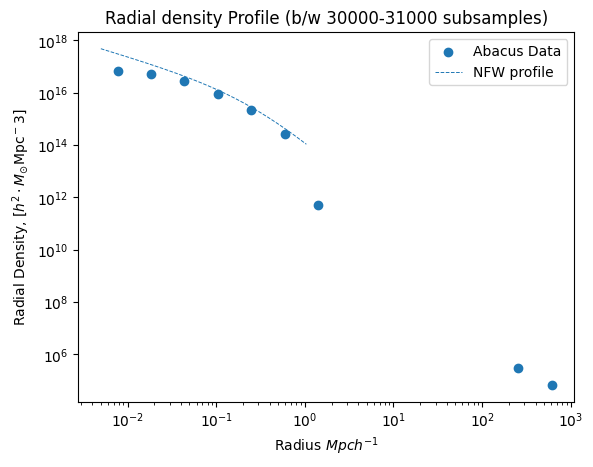

In [203]:
def rad_density_function(rad_list, particle_mass, b,z, part_numb):

    min_rad=[]
    max_rad=[]
    for i in range(len(rad_list)):
        min = np.min(rad_list[i])
        max=np.max(rad_list[i])
        min_rad.append(min)
        max_rad.append(max)

    bineq = np.logspace(np.log10(np.min(min_rad)-0.00001),np.log10(np.max(max_rad)+0.01),b)
    
    freq_lists=[]
    freq=0
    for i in range(len(rad_list)):
        frequency, bin_edge = np.histogram(rad_list[i], bins=bineq)
        freq_lists.append(frequency)
        freq+=frequency

    fraction= np.sum(part_numb)/np.sum(freq)

    volume=[]
    mass_point=[]
    for i in range(len(bineq)-1):
        vol = (4/3)*np.pi*(bineq[i+1]**3-bineq[i]**3)
        mass_pt =  (bineq[i+1]*bineq[i])**(1/2)
        volume.append(vol)
        mass_point.append(mass_pt)
    #print(volume)
    density = ((freq*particle_mass)/(volume))*fraction
    avg_density = density/len(part_numb)
    #print(freq*particle_mass)

    radial_density_comoving= ((1+z)**3)* np.array(avg_density)
    plt.loglog()
    plt.scatter(mass_point,radial_density_comoving,label='Abacus Data')
    

def radial_density_prof_halomod(part_numb, part_mass, radius,r100,z,SOdensityL1):
    h=0.6736
    Ob0 = 0.02237/h**2
    Om0 = 0.315192
    n_s = 0.9649
    sigma_8 = 0.807952

    hm=DMHaloModel(cosmo_model=Planck18,cosmo_params={'Om0':Om0, 'H0':h*100, 'Ob0':Ob0},n=n_s,sigma_8=sigma_8 , z=z,
               mdef_model=mass_definitions.SOMean,mdef_params={'overdensity':SOdensityL1},halo_profile_model='NFWInf',halo_concentration_model='Ludlow16')
    #print(TracerHaloModel.parameter_info())

    min_rad=[]
    max_rad=[]
    for i in range(len(radius)):
        min = np.min(radius[i])
        max=np.max(radius[i])
        min_rad.append(min)
        max_rad.append(max)

    r = np.logspace(np.log10(np.min(min_rad)-0.00001), np.log10(np.max(r100)+0.001), 1000)
    indices = np.argsort(r)

    total_mass=0
    for i in range(len(part_numb)):
        total_mass+= part_numb[i]*part_mass
    avg_mass=total_mass/len(part_numb)

    rad_density_halomod = hm.halo_profile.rho(r=r[indices], m=avg_mass)
    
    plt.loglog()

    plt.plot(r[indices], rad_density_halomod,'--',lw=0.7,label='NFW profile')
   
    


        
            

        
        
        


rad_density_function(ra, particle_mass, b,z,particle_number)
radial_density_prof_halomod(particle_number, particle_mass,ra,r100,z,SOdensityL1)


plt.title(f'Radial density Profile (b/w {halo_min}-{halo_max} subsamples)')
plt.xlabel('Radius $Mpc h^{-1}$')
plt.ylabel(r'Radial Density, $[h^2\cdot M_{\odot}\text{Mpc}^-3]$')
#plt.savefig('radia_density_profile.png')
plt.legend()
plt.show()
